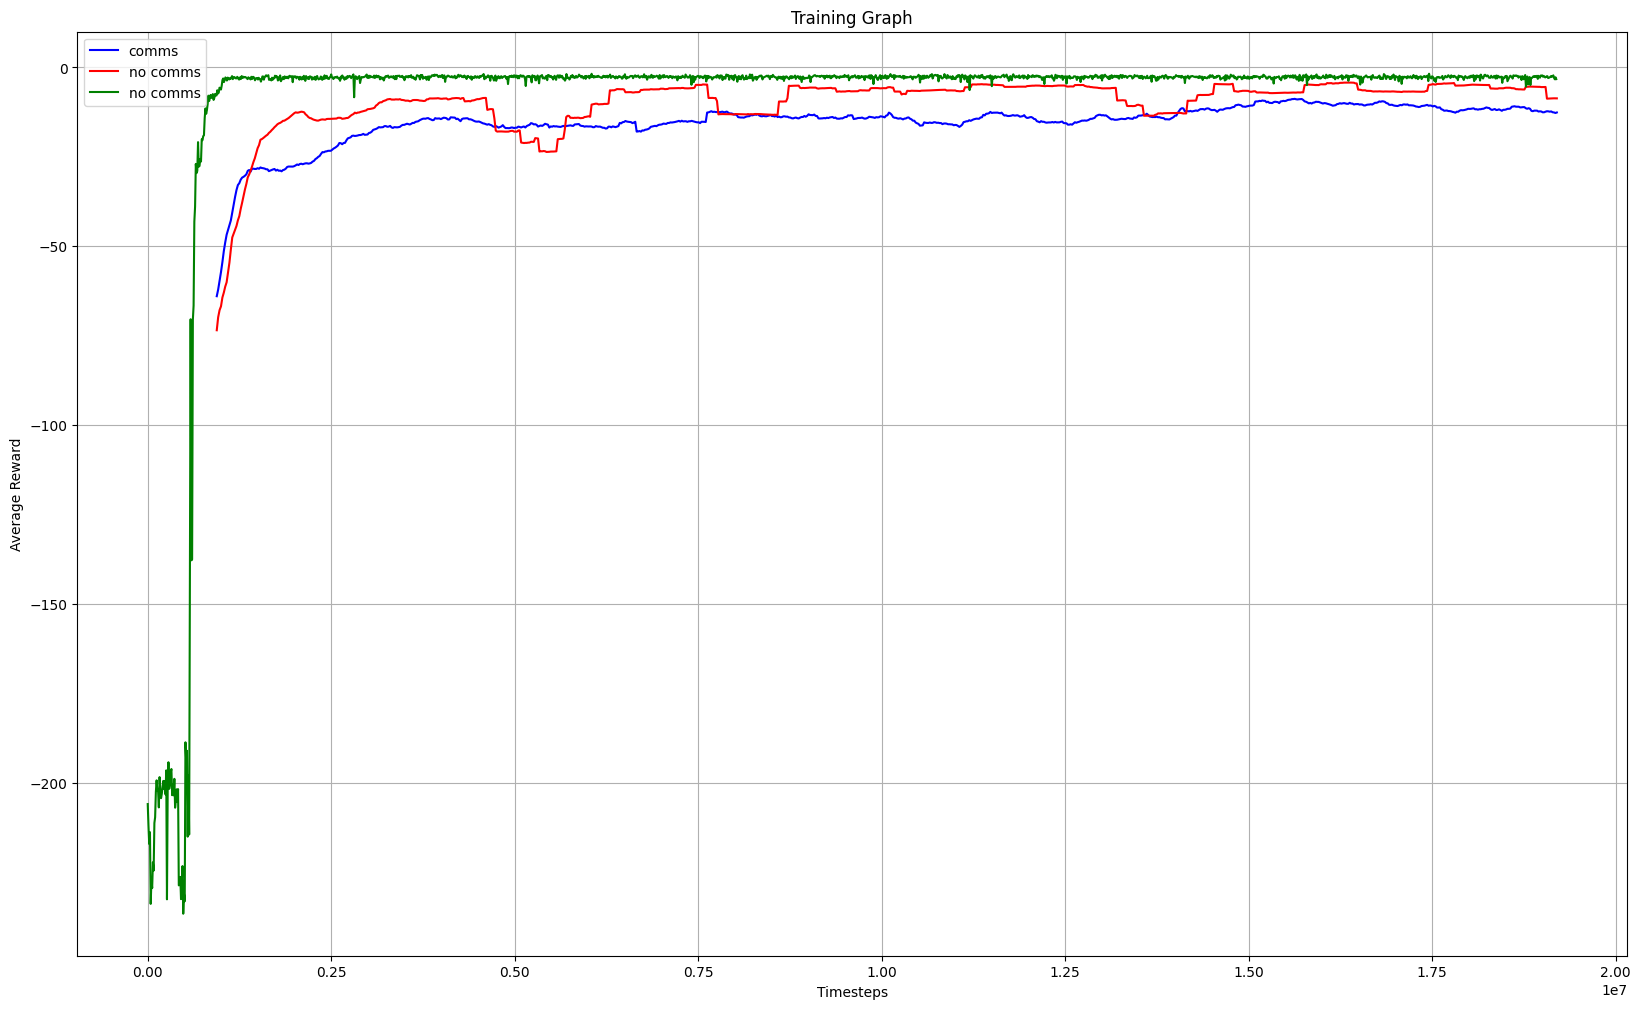

In [1]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import json

skip_end_rows = 3

# Load CSV into a DataFrame
csv_comms_file_path = 'D:/Thesis_stuff/Thesis_Results/Phase2/limit_analyse_no_block/comms/trial.csv'
total_rows = pd.read_csv(csv_comms_file_path).shape[0]
df_comms = pd.read_csv(csv_comms_file_path, skiprows=1, nrows=total_rows - skip_end_rows - 1)

csv_no_comms_file_path = 'D:/Thesis_stuff/Thesis_Results/Phase1/50_detect/no_comms/trial.csv'
total_rows = pd.read_csv(csv_no_comms_file_path).shape[0]
df_no_comms = pd.read_csv(csv_no_comms_file_path, skiprows=1, nrows=total_rows - skip_end_rows - 1)

#df_comms_train = df_comms[(df_comms['Train_Episode'] != 0) | (df_comms['Train_Reward'] != 0)].copy()
df_comms_test = df_comms[(df_comms['Test_Episode'] != 0) | (df_comms['Test_Reward'] != 0)].copy()

#df_no_comms_train = df_no_comms[(df_no_comms['Train_Episode'] != 0) | (df_no_comms['Train_Reward'] != 0)].copy()
df_no_comms_test = df_no_comms[(df_no_comms['Test_Episode'] != 0) | (df_no_comms['Test_Reward'] != 0)].copy()
# Calculate total timesteps for each episode
timesteps_per_episode = 64 * 30

# Calculate rolling average of rewards
window_size = 50  # You can adjust this parameter for the desired smoothing effect

#df_comms_train['Mean_Train_Reward'] = df_comms_train['Train_Reward'].rolling(window=window_size).mean()
df_comms_test['Mean_Test_Reward'] = df_comms_test['Test_Reward'].rolling(window=window_size).mean()
df_comms_test['Timesteps'] = df_comms_test['Test_Episode'] * timesteps_per_episode
#df_no_comms_train['Mean_Train_Reward'] = df_no_comms_train['Train_Reward'].rolling(window=window_size).mean()
df_no_comms_test['Mean_Test_Reward'] = df_no_comms_test['Test_Reward'].rolling(window=window_size).mean()
df_no_comms_test['Timesteps'] = df_no_comms_test['Test_Episode'] * timesteps_per_episode

#Load QMix json file
with open('D:/Thesis_stuff/Thesis_Results/Phase1/50_detect/qmix/info.json') as f:
    data = json.load(f)

# Extract the 'return_mean' values and 'return_mean_T' (timesteps)
test_return_means = [item['value'] for item in data['test_return_mean']]
test_timesteps = data['test_return_mean_T']

# Create a DataFrame
df_qmix_test = pd.DataFrame({'Timesteps': test_timesteps, 'Return_Mean': test_return_means})

# Plot episode vs reward
plt.figure(figsize=(20, 12))
plt.plot(df_comms_test['Timesteps'], df_comms_test['Mean_Test_Reward'], linestyle='-', label='comms', color='blue')
plt.plot(df_no_comms_test['Timesteps'], df_no_comms_test['Mean_Test_Reward'], linestyle='-', label='no comms', color='red')
plt.plot(df_qmix_test['Timesteps'], df_qmix_test['Return_Mean'], linestyle='-', label='no comms', color='green')
plt.legend()
plt.title('Training Graph')
plt.xlabel('Timesteps')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

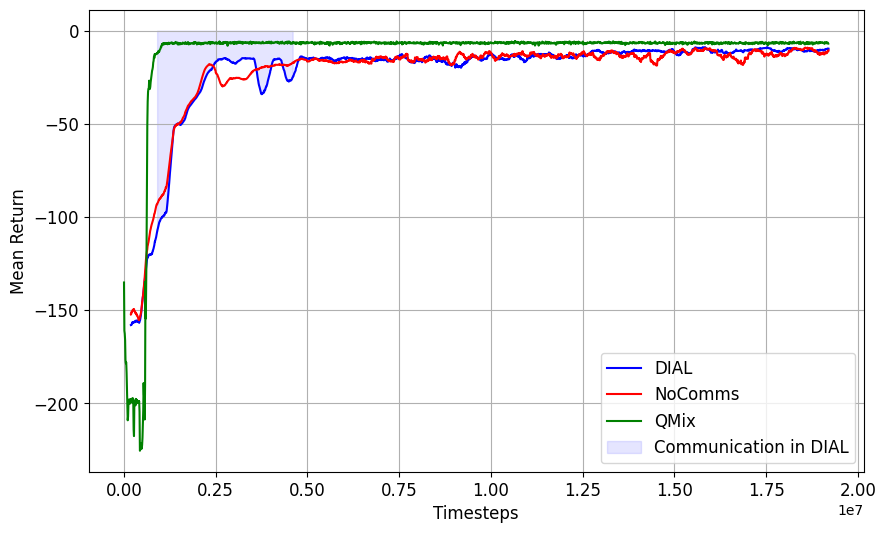

In [66]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import json

skip_end_rows = 3

# Load CSV into a DataFrame
csv_comms_file_path = 'D:/Thesis_stuff/Thesis_Results/Phase1/50_detect/comms/trial.csv'
total_rows = pd.read_csv(csv_comms_file_path).shape[0]
df_comms = pd.read_csv(csv_comms_file_path, skiprows=1, nrows=total_rows - skip_end_rows - 1)

csv_no_comms_file_path = 'D:/Thesis_stuff/Thesis_Results/Phase1/50_detect/no_comms/trial.csv'
total_rows = pd.read_csv(csv_no_comms_file_path).shape[0]
df_no_comms = pd.read_csv(csv_no_comms_file_path, skiprows=1, nrows=total_rows - skip_end_rows - 1)

df_comms_train = df_comms[(df_comms['Train_Episode'] != 0) | (df_comms['Train_Reward'] != 0)].copy()
#df_comms_test = df_comms[(df_comms['Test_Episode'] != 0) | (df_comms['Test_Reward'] != 0)].copy()

df_no_comms_train = df_no_comms[(df_no_comms['Train_Episode'] != 0) | (df_no_comms['Train_Reward'] != 0)].copy()
#df_no_comms_test = df_no_comms[(df_no_comms['Test_Episode'] != 0) | (df_no_comms['Test_Reward'] != 0)].copy()
# Calculate total timesteps for each episode
timesteps_per_episode = 128 * 30

# Calculate rolling average of rewards
window_size = 50  # You can adjust this parameter for the desired smoothing effect
qmix_window_size = 1
df_comms_train['Mean_Train_Reward'] = df_comms_train['Train_Reward'].rolling(window=window_size).mean()
#df_comms_test['Mean_Test_Reward'] = df_comms_test['Test_Reward'].rolling(window=window_size).mean()
df_comms_train['Timesteps'] = df_comms_train['Train_Episode'] * timesteps_per_episode

df_no_comms_train['Mean_Train_Reward'] = df_no_comms_train['Train_Reward'].rolling(window=window_size).mean()
#df_no_comms_test['Mean_Test_Reward'] = df_no_comms_test['Test_Reward'].rolling(window=window_size).mean()
df_no_comms_train['Timesteps'] = df_no_comms_train['Train_Episode'] * timesteps_per_episode

# Filter the data to include only timesteps less than or equal to 19,200,000
df_comms_train = df_comms_train[df_comms_train['Timesteps'] <= 19200000]
df_no_comms_train = df_no_comms_train[df_no_comms_train['Timesteps'] <= 19200000]


#Load QMix json file
with open('D:/Thesis_stuff/Thesis_Results/Phase1/50_detect/qmix/info.json') as f:
    data = json.load(f)

# Extract the 'return_mean' values and 'return_mean_T' (timesteps)
return_means = [item['value'] for item in data['return_mean']]
timesteps = data['return_mean_T']

# Create a DataFrame
df_qmix_train = pd.DataFrame({'Timesteps': timesteps, 'Return_Mean': return_means})
df_qmix_train['Timesteps'] = df_qmix_train['Timesteps']
df_qmix_train = df_qmix_train[df_qmix_train['Timesteps'] <= 19200000]
df_qmix_train['Return_Mean'] = df_qmix_train['Return_Mean'].rolling(window=qmix_window_size).mean()

# Plot episode vs reward
plt.figure(figsize=(10, 6))
plt.plot(df_no_comms_train['Timesteps'], df_no_comms_train['Mean_Train_Reward'], linestyle='-', label='DIAL', color='blue')
plt.plot(df_comms_train['Timesteps'], df_comms_train['Mean_Train_Reward'], linestyle='-', label='NoComms', color='red')

plt.plot(df_qmix_train['Timesteps'], df_qmix_train['Return_Mean'], linestyle='-', label='QMix', color='green')
plt.fill_between(df_no_comms_train['Timesteps'], df_no_comms_train['Mean_Train_Reward'], where=(df_no_comms_train['Timesteps'] >= 900000) & (df_no_comms_train['Timesteps'] <= 4600000), label='Communication in DIAL',color='blue', alpha=0.1)

# Add label for shaded area
#plt.text(3450000, df_comms_train['Mean_Train_Reward'].max()*0.8, 'Meaningful communication', color='blue', fontsize=12)
plt.legend(fontsize=12)
#plt.title('Training Graph', fontsize=12)
plt.xlabel('Timesteps', fontsize=12)
plt.ylabel('Mean Return', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)  # Adjust the font size for x-axis tick labels
plt.yticks(fontsize=12)  # Adjust the font size for y-axis tick labels
plt.show()

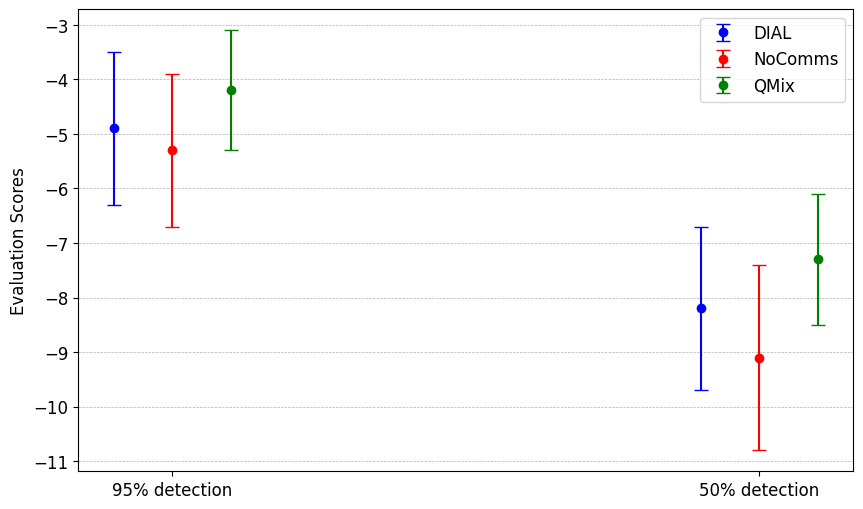

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data

scenarios = ['95% detection', '50% detection']
scores_dial = [-4.9, -8.2]
errors_dial = [1.4, 1.5]
scores_dial_no_comms = [-5.3, -9.1]
errors_dial_no_comms = [1.4, 1.7]
scores_qmix = [-4.2, -7.3]
errors_qmix = [1.1, 1.2]


# Position of the bars on the x-axis
x_pos = np.arange(len(scenarios))

# Size of the figure
plt.figure(figsize=(10, 6))

# Plotting the bars for dial
plt.errorbar(x_pos - 0.1, scores_dial, yerr=errors_dial, fmt='o', capsize=5, label='DIAL', color='blue')

# Plotting the bars for dial no comms
plt.errorbar(x_pos, scores_dial_no_comms, yerr=errors_dial_no_comms, fmt='o', capsize=5, label='NoComms', color='red')

# Plotting the bars for qmix
plt.errorbar(x_pos + 0.1, scores_qmix, yerr=errors_qmix, fmt='o', capsize=5, label='QMix', color='green')

# Adding labels and title
plt.ylabel('Evaluation Scores', fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
#plt.title('Evaluation Scores with Standard Deviation for Phase 1')
plt.xticks(x_pos, scenarios, fontsize=12)  # Set labels manually
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.show()


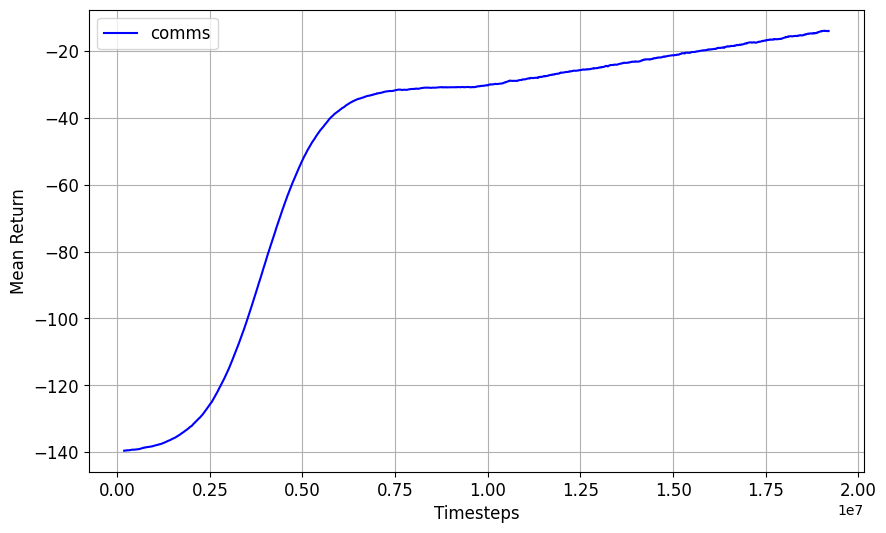

         Epoch      Score
0            0        NaN
1         3840        NaN
2         7680        NaN
3        11520        NaN
4        15360        NaN
...        ...        ...
4995  19180800 -14.050462
4996  19184640 -14.051318
4997  19188480 -14.039053
4998  19192320 -14.055582
4999  19196160 -14.002559

[5000 rows x 2 columns]


In [50]:
import numpy as np
import pandas as pd

# Set parameters for the simulation
epochs = 5000
start_score = -140.4
mid_score = -30.7  # Approximate middle score
end_score = -13.6  # Final score at 5000 epochs

# Generate the epochs
epoch_indices = np.linspace(0, epochs-1, epochs)

# Create a more rounded and dynamic learning curve
# Use a logistic growth model for the first part to achieve a smoother transition
logistic_part = mid_score + (start_score - mid_score) / (1 + np.exp((epoch_indices - 1000) / 200))
# Transition to a linear part with minor fluctuations
linear_part_start = np.where(epoch_indices == 2500)[0][0]
linear_part = np.linspace(logistic_part[linear_part_start], end_score, epochs - linear_part_start)
linear_part += np.random.normal(0, 0.5, len(linear_part))  # Adding noise for fluctuation
# Combine the parts
scores = np.concatenate([logistic_part[:linear_part_start], linear_part])

# Add random noise to simulate variations in learning
noise = np.random.normal(0, 0.5, epochs)
scores += noise
timesteps_per_episode = 128 * 30
# Create a DataFrame with the results
results_comms_df = pd.DataFrame({
    'Epoch': epoch_indices.astype(int) * timesteps_per_episode,
    'Score': scores
})
results_comms_df['Score'] = results_comms_df['Score'].rolling(window=window_size).mean()
plt.figure(figsize=(10, 6))
plt.plot(results_comms_df['Epoch'], results_comms_df['Score'], linestyle='-', label='comms', color='blue')
#plt.plot(df_no_comms_train['Timesteps'], df_no_comms_train['Mean_Train_Reward'], linestyle='-', label='no comms', color='red')
#plt.plot(df_qmix_train['Timesteps'], df_qmix_train['Return_Mean'], linestyle='-', label='qmix', color='green')
plt.legend(fontsize=12)
#plt.title('Training Graph', fontsize=12)
plt.xlabel('Timesteps', fontsize=12)
plt.ylabel('Mean Return', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)  # Adjust the font size for x-axis tick labels
plt.yticks(fontsize=12)  # Adjust the font size for y-axis tick labels
plt.show()
print(results_comms_df)


In [83]:
import ast  # For safely evaluating the string representation of lists

# Mapping dictionary for criteria
mapping = {
    (0, 0, 0): 'Not',
    (1, 0, 1): 'Just Exploited',
    (0, 0, 1): 'User',
    (0, 1, 0): 'Unknown',
    (0, 1, 1): 'Privileged',
}

# Function to apply mapping
def apply_mapping(sublist):
    return [mapping.get(tuple(item), item) for item in sublist]

# Function to parse a line and return a dictionary
def parse_line(line):
    data = {}
    if "Message sent:" in line:
        data['Message'] = ast.literal_eval(line.split("Message sent:")[1].strip())
        for i in range(len(data['Message'])):
            for j in range(len(data['Message'][i])):
                if data['Message'][i][j] < 0.1:
                    data['Message'][i][j] = 0.0
    elif "Action:" in line:
        data['Action'] = ast.literal_eval(line.split("Action:")[1].strip())
    elif "State:" in line:
        state = ast.literal_eval(line.split("State:")[1].strip())
        t_state = [[state[i][j:j+3] for j in range(0, len(state[i]), 3)] for i in range(len(state))]
        data['State'] = [apply_mapping(sublist) for sublist in t_state]
        #data['State'] = [[state[i][j:j+3] for j in range(0, len(state[i]), 3)] for i in range(len(state))]
    return data

# Read the file and create a list of dictionaries for each game
current_game = []
turn = {}
games_data = []

with open('C:/Users/Contractor/Workspace/CyMARL/pycomm/results/confidentiality_small/comms/0.txt', 'r') as file:
    for line in file:
        if '---- Turn 0 ----' in line:
            # Starting a new game
            if current_game:
                current_game = []
                turn = {}
        else:
            if 'State' in line:
                if turn:
                    current_game.append(turn)
                    turn = {}
                    turn.update(parse_line(line))
                else:
                    turn.update(parse_line(line))
            else:
                if 'Total Reward' in line:
                    current_game.append(turn)
                    games_data.append(current_game)
                else:
                    turn.update(parse_line(line))

In [84]:
import matplotlib.pyplot as plt
import numpy as np
# Extract relevant information
agent_messages = []  # List to store messages sent by each agent
for game_data in games_data:
    for timestep_data in game_data:
        agent_messages.append(timestep_data['Message'])

# Convert the list of messages to a flattened NumPy array for plotting
flat_messages = np.concatenate(agent_messages)

#print(flat_messages)

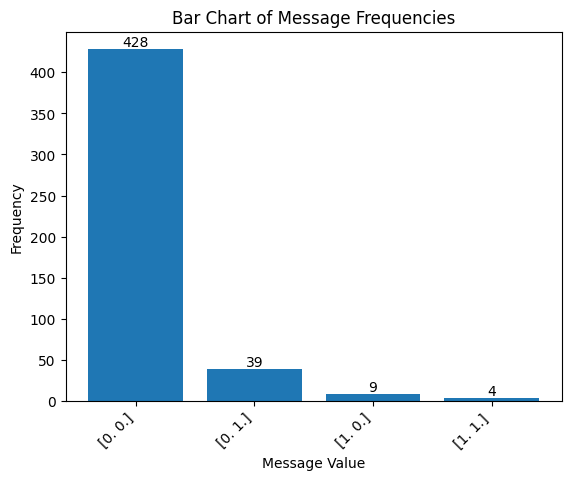

In [85]:
# Count occurrences of each unique message pair
unique_messages, counts = np.unique(flat_messages, axis=0, return_counts=True)

# Plotting bar chart for message frequencies with annotations
fig, ax = plt.subplots()
bars = ax.bar(range(len(unique_messages)), counts, tick_label=[str(pair) for pair in unique_messages])
ax.set_xlabel('Message Value')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart of Message Frequencies')
ax.set_xticks(range(len(unique_messages)))  # Set tick positions
ax.set_xticklabels([str(pair) for pair in unique_messages], rotation=45, ha='right')  # Set tick labels with rotation
ax.tick_params(axis='x', labelrotation=45)

# Adding text annotations for each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.show()

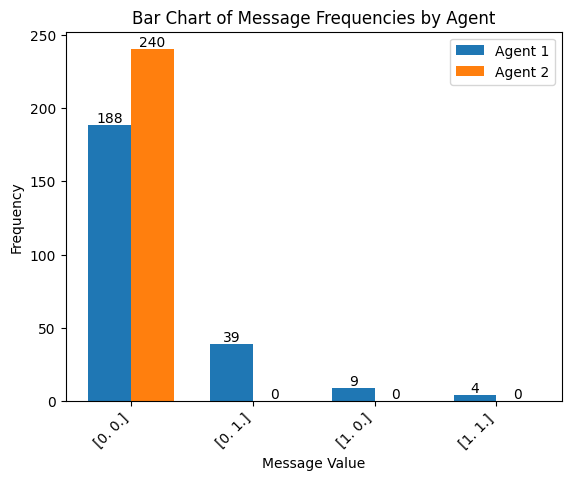

In [86]:
# Separate messages for Agent 1 and Agent 2
messages_agent1 = flat_messages[::2]  # Select every other element starting from the first
messages_agent2 = flat_messages[1::2]  # Select every other element starting from the second

# Count occurrences of each unique message pair for each agent
unique_messages_agent1, counts_agent1 = np.unique(messages_agent1, axis=0, return_counts=True)
unique_messages_agent2, counts_agent2 = np.unique(messages_agent2, axis=0, return_counts=True)

# Ensure both counts arrays have the same length
max_len = max(len(counts_agent1), len(counts_agent2))
counts_agent1 = np.pad(counts_agent1, (0, max_len - len(counts_agent1)))
counts_agent2 = np.pad(counts_agent2, (0, max_len - len(counts_agent2)))

# Set up the positions for side-by-side bars
bar_width = 0.35
index = np.arange(max_len)

# Plotting side-by-side bar chart for message frequencies with annotations
fig, ax = plt.subplots()
bars1 = ax.bar(index - bar_width / 2, counts_agent1, bar_width, label='Agent 1')
bars2 = ax.bar(index + bar_width / 2, counts_agent2, bar_width, label='Agent 2')
ax.set_xlabel('Message Value')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart of Message Frequencies by Agent')
ax.set_xticks(index)
ax.set_xticklabels([str(pair) for pair in unique_messages_agent1], rotation=45, ha='right')
ax.legend()

# Adding text annotations for each bar (Agent 1)
for bar, count in zip(bars1, counts_agent1):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

# Adding text annotations for each bar (Agent 2)
for bar, count in zip(bars2, counts_agent2):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.show()

In [87]:
import seaborn as sns

# Extract relevant information
state = []  # List to store tuples of state and message frequency
for game_data in games_data:
    for timestep_data in game_data:
        state.append(timestep_data['State'])

flat_states = np.concatenate(state)

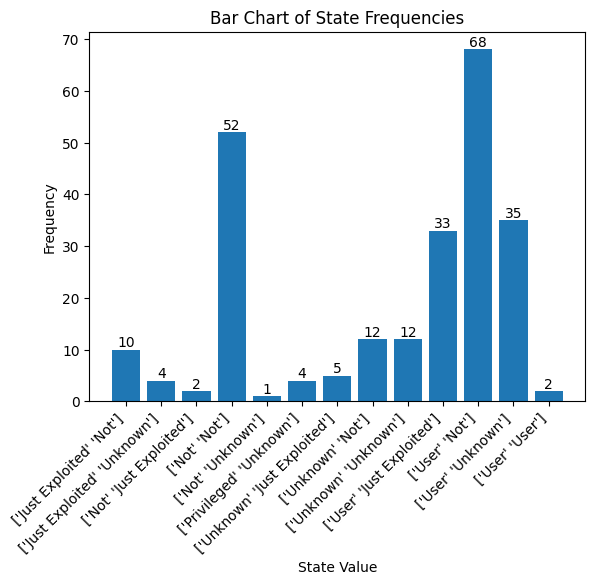

In [88]:
states_agent1 = flat_states[::2]  # Select every other element starting from the first

unique_states_agent1, counts_states_agent1 = np.unique(states_agent1, axis=0, return_counts=True)

# Plotting bar chart for message frequencies with annotations
fig, ax = plt.subplots()
bars = ax.bar(range(len(unique_states_agent1)), counts_states_agent1, tick_label=[str(pair) for pair in unique_states_agent1])
ax.set_xlabel('State Value')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart of State Frequencies')
ax.set_xticks(range(len(unique_states_agent1)))  # Set tick positions
ax.set_xticklabels([str(pair) for pair in unique_states_agent1], rotation=45, ha='right')  # Set tick labels with rotation
ax.tick_params(axis='x', labelrotation=45)

# Adding text annotations for each bar
for bar, count in zip(bars, counts_states_agent1):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom')

plt.show()

Counter({(('User', 'Not'), (0.0, 0.0)): 55, (('Not', 'Not'), (0.0, 0.0)): 52, (('User', 'Just Exploited'), (0.0, 0.0)): 30, (('User', 'Unknown'), (0.0, 1.0)): 18, (('User', 'Unknown'), (0.0, 0.0)): 17, (('Unknown', 'Not'), (0.0, 0.0)): 12, (('Unknown', 'Unknown'), (0.0, 1.0)): 10, (('Just Exploited', 'Not'), (0.0, 0.0)): 9, (('User', 'Not'), (1.0, 0.0)): 6, (('User', 'Not'), (0.0, 1.0)): 5, (('Unknown', 'Just Exploited'), (0.0, 0.0)): 4, (('Privileged', 'Unknown'), (0.0, 0.0)): 3, (('User', 'Not'), (1.0, 1.0)): 2, (('Unknown', 'Unknown'), (0.0, 0.0)): 2, (('Not', 'Just Exploited'), (0.0, 0.0)): 2, (('Just Exploited', 'Unknown'), (0.0, 1.0)): 2, (('User', 'Just Exploited'), (0.0, 1.0)): 2, (('User', 'Just Exploited'), (1.0, 1.0)): 1, (('User', 'User'), (1.0, 0.0)): 1, (('Privileged', 'Unknown'), (1.0, 0.0)): 1, (('Unknown', 'Just Exploited'), (1.0, 0.0)): 1, (('Just Exploited', 'Unknown'), (0.0, 0.0)): 1, (('User', 'User'), (0.0, 0.0)): 1, (('Just Exploited', 'Not'), (0.0, 1.0)): 1, (('

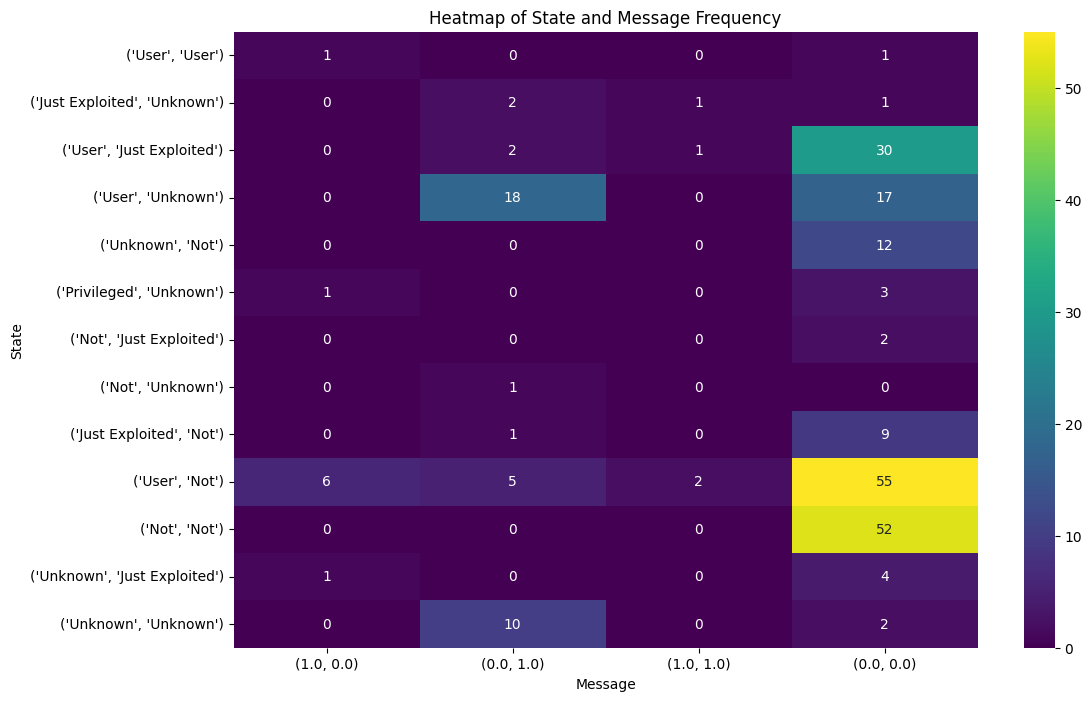

In [112]:
import seaborn as sns
from collections import Counter

# Extract relevant information
states = []  # List to store tuples of state and message frequency
messages = []
for game_data in games_data:
    for timestep_data in game_data:
        states.append(timestep_data['State'])
        messages.append(timestep_data['Message'])

# Convert inner lists to tuples
states_agent_1 = [tuple(sublist[0]) for sublist in states]
messages_agent_1 = [tuple(sublist[0]) for sublist in messages]

# Create a list of tuples combining states and messages
state_message_pairs = list(zip(states_agent_1, messages_agent_1))

# Count occurrences of each unique state and message pair
pair_counter = Counter(state_message_pairs)
print(pair_counter)

# Get unique states and messages directly from the tuples
unique_states = list(set(states_agent_1))
unique_messages = list(set(messages_agent_1))
print(unique_states)
print(unique_messages)

# Create a 2D array to represent the frequency of messages for each state
heatmap_data = [[pair_counter[(state, message)] for message in unique_messages] for state in unique_states]
print(heatmap_data)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, xticklabels=[str(pair) for pair in unique_messages], yticklabels=[str(pair) for pair in unique_states], annot=True, cmap='viridis', cbar=True)

plt.xlabel('Message')
plt.ylabel('State')
plt.title('Heatmap of State and Message Frequency')
plt.show()